First, we import sympy, numpy, matplotlib,and ipython.display libraries; and, initiate latex printing.

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
init_printing()

We want to optimize the acceleration at launch of the rocket design shown below.

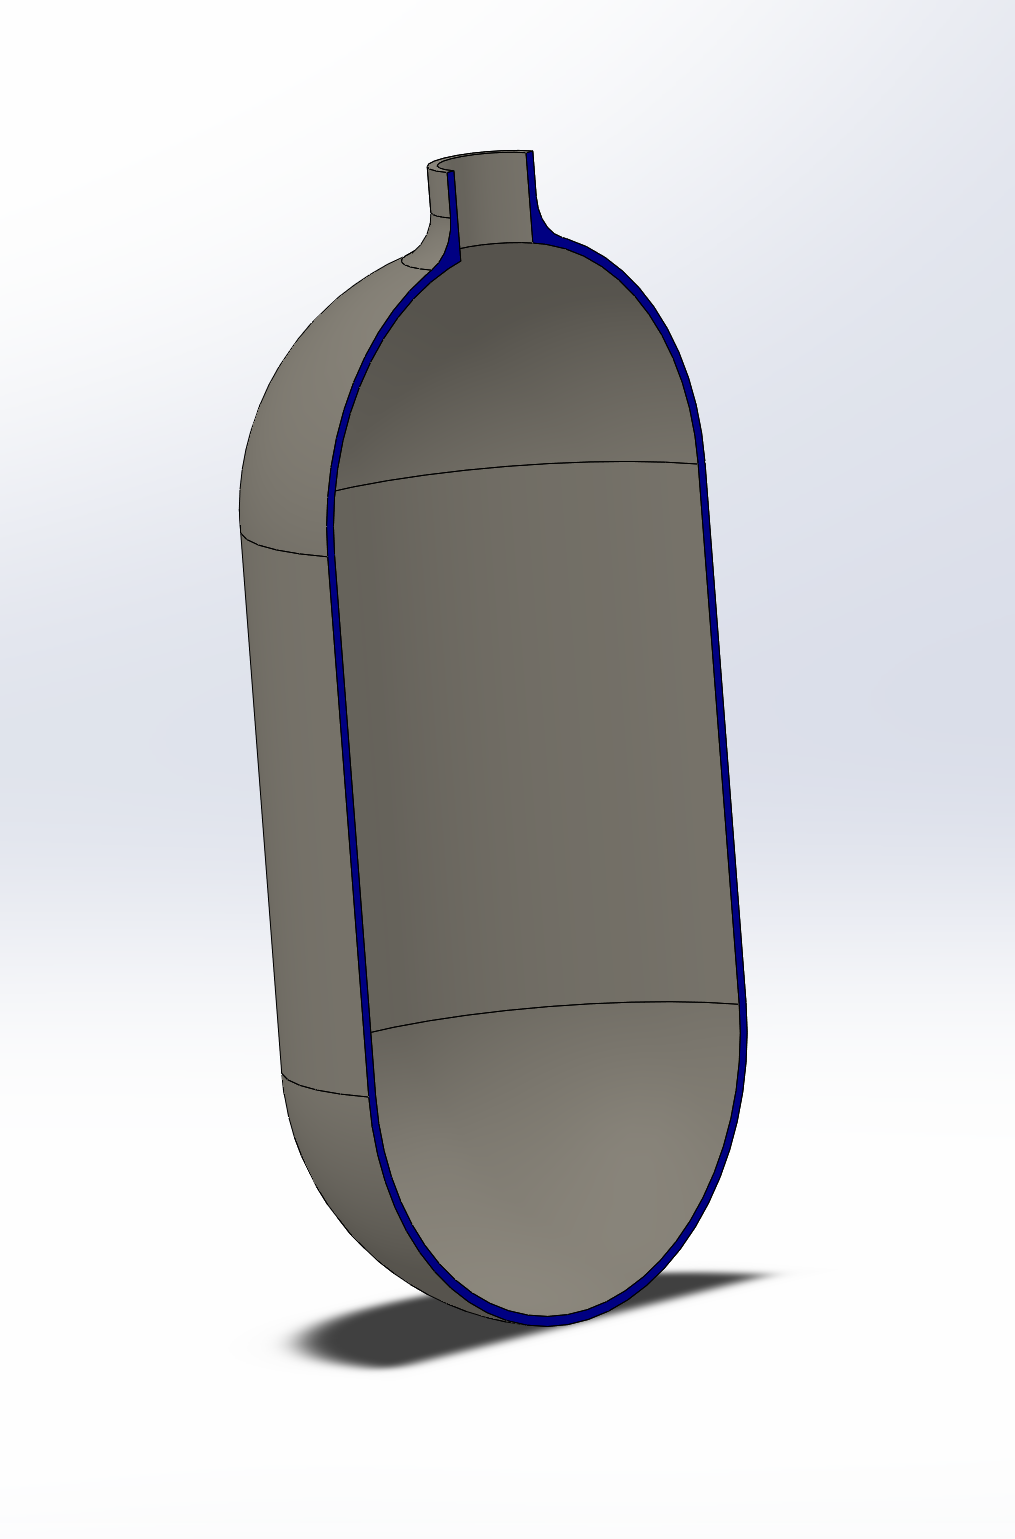

In [2]:
Image(filename='SLDWORKS_lJ3xjb2x4o.png')

Rocket design with cross section.

We want the maximum possible acceleration, **a** to be achieved by our rocket. In order to do this we are optimizing the rocket Equation shown below. This equation came from https://www.grc.nasa.gov/WWW/K-12/rocket/rktslaunch.html and describes the acceleration of a pressurized rocket based on variables: $P_{i}$-internal pressure,$P_{atm}$-external pressure, **a**-acceleration, **g**-gravitational acceleration, **A**-cross sectional area, **t**-time, **W**-weight. 

We initiate these symbols and establish a symbolic relationship for the acceleration, **a**.

In [3]:
Pi,po,a,g,A,t,W,ro=symbols('P_i,P_atm,a,g,A,t,W,r_o')
a = g*(((Pi-po)*A)/W-1)

The expression for **a** is given as:

In [4]:
print('a=')
a

a=


This equation currently does not satisfy the candidate design problem project requirement for as is. There are only 3 design variables when the project requires there to be 4. This can be fixed by substituting in an expression for **A**.

In [5]:
r=symbols('r')
A1 = pi*r**2

a = a.subs(A,A1)
a

This objective equation also does not meet the minimum criteria for the design candidate problem of at least 4 design variables. The weight however is a function of the designs volume. In order to meet the criteria for minimum design variables, we add an expression for volume and substitute it into the candidate design problem with the followiung additional design variables: $r_{i}$ - inner radius, $r_{o}$ - outer radius, and **h** - cylinder height. 

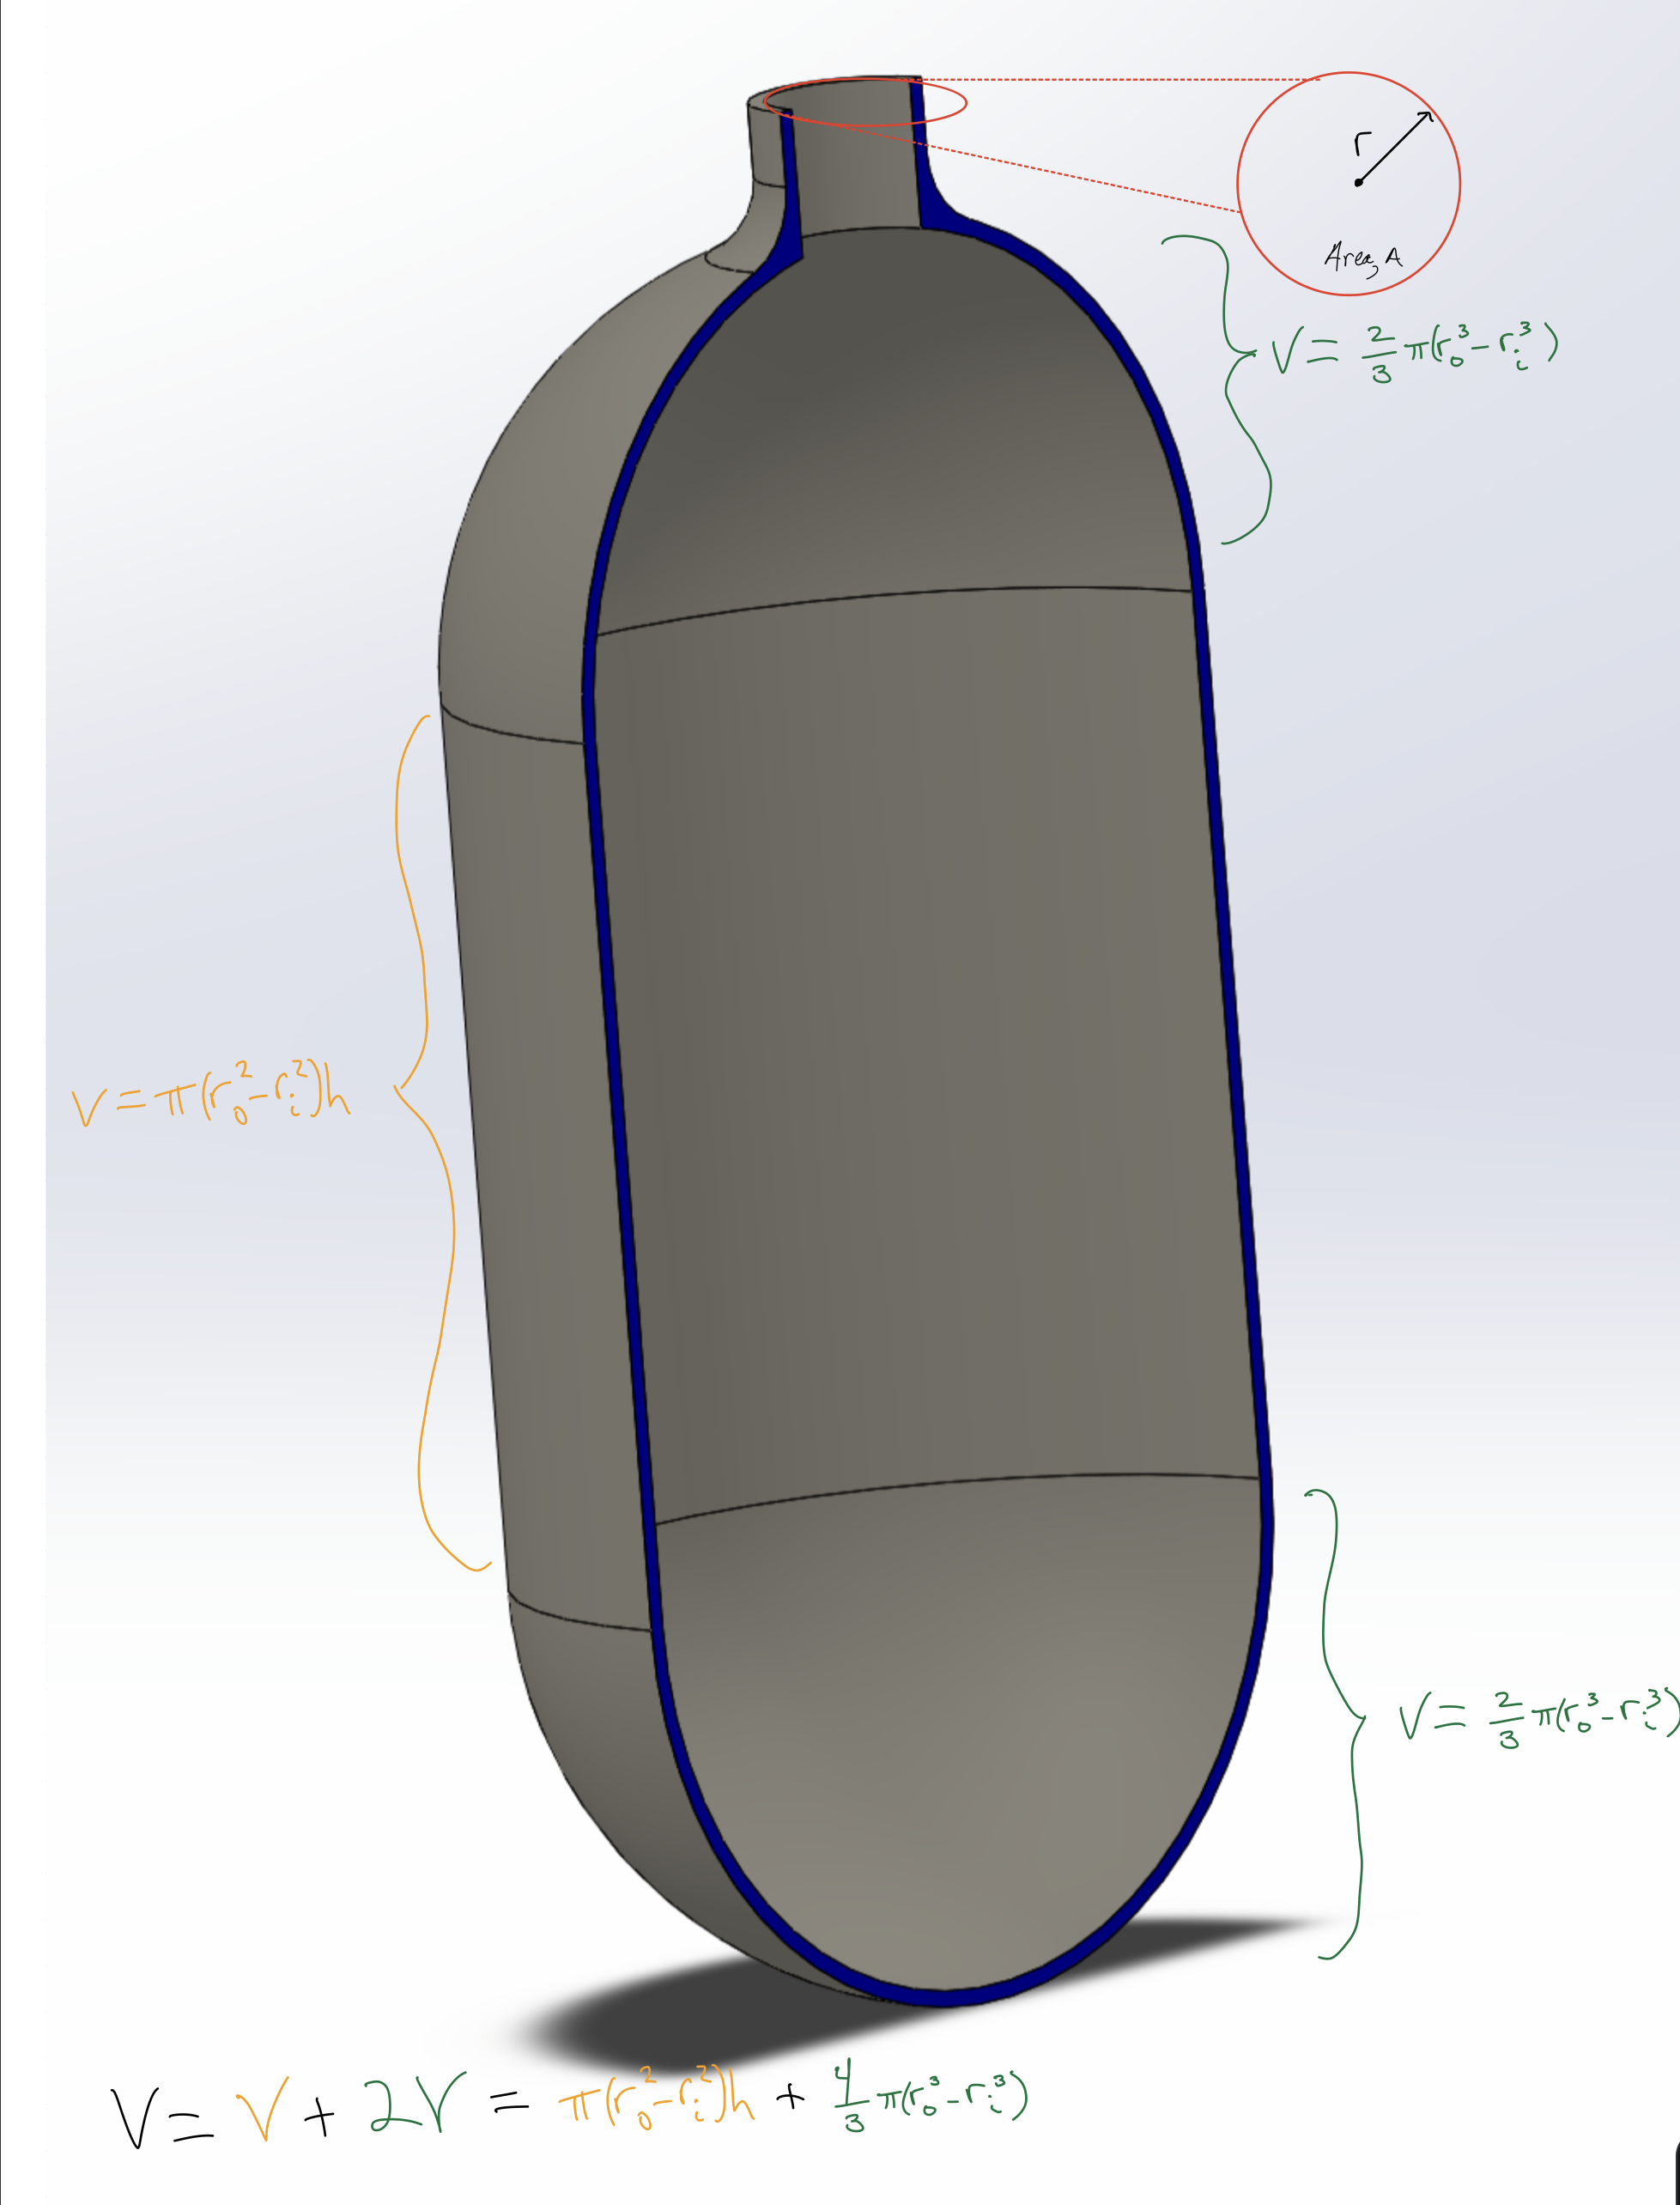

In [6]:
Image(filename='20201106_055134491_iOS.png')

In [7]:
ri,h,V,rho,w1=symbols('r_i, h,V,rho,w1')
V = pi*(ro**2-ri**2)*h+(4/3)*pi*(ro**3-ri**3)

Now we need a function for W to sub in. We establish W = $\rho$***V**. Where **$\rho$** is the density and **V** is the Volume. We sub in our expression for volume.

In [8]:
w1 = rho*V*g
w1

Now that we have a new expression for W we sub it into our candidate design problem.

In [9]:
a = a.subs(W,w1)

The new candidate objective problem becomes,

a=

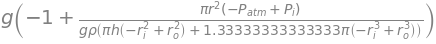

In [10]:
print('a=',end='')
a

Now, we want to change then design variables to the form: **x1** - radius of exit throat, **x2** - inner radius, **x3** - outer radius, **x4** - height of midsection, and **x5** - internal pressure.
We establish these variables symbolically and make these subsitutions.

In [11]:
x1,x2,x3,x4,x5=symbols('x_1,x_2,x_3,x_4,x_5')
a = a.subs(r,x1)
a = a.subs(ri,x2)
a = a.subs(ro,x3)
a = a.subs(h,x4)
a = a.subs(Pi,x5)

Our candidate objective function becomes.

fx=


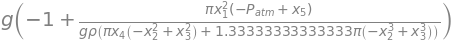

In [12]:
print('fx=')
a

This objective function meets the candidate criteria. Now we begin to define objective function constraints. The value of the internal pressure cannot exceed the critical pressure $P_{cr}$ this imposes $g_{1}$ : $P_{cr}$-$P_{i} <= 0$ as a constraint. The value of the thickness of the vessel should not be below **2mm** this allows for the constraint: $g_{2}$ : $r_{o}$-$r_{i}$-$.002{m} <= 0$. The outer radius cannot be greater than 200mm due to the 3D printer bed size. This implies constraint g3: $r_{o}$-$.200{m}<=0$

We establish these constraints programattically.


In [13]:
g1,g2,g3,Pcr=symbols('g_1,g_2,g_3,Pcr')

g1 = Pcr-Pi <= 0
g2 = ri-ro-.002 <= 0
g3 = ro-.200 <= 0

This gives us constraints:

In [14]:
g1

In [15]:
g2

In [16]:
g3

We want these in terms of variables $x_{1}, x_{2}, x_{3}, x_{4},$ and $x_{5}$. Subbing in the values **$x_{5}=P_{i}$** - internal pressure, **$x_{2}=r_{i}$** - inner radius, and $x_{3}=r_{o}$ - outer radius into $g_{1},  g_{2},  g_{3}$.

In [17]:
g1 = g1.subs(Pi,x5)
g2 = g2.subs(ri,x2)
g2 = g2.subs(ro,x3)
g3 = g3.subs(ro,x3)


The new constraint equations are.

In [18]:
g1

In [19]:
g2

In [20]:
g3

Now, we want to define all design variables except two design variables. So that our objective function is 2D and we can visualize the data.

In [21]:
a = a.subs(x1,x3)#104 cm radius
a = a.subs(x2,.094)#inner radius of rocket
#a = a.subs(x3,.104)#outer radius of the rocket
#a = a.subs(x4,.109)#109 mm height
a = a.subs(x5,101325+861845)#125 psi converted to pascals internal pressure, this value was chosen within an assumed range
a = a.subs(po,101325)#101325 pascal atmopsheric pressure
a = a.subs(rho,1.24*.2)#1.24 Kg/m^3 with 20% infill density
a = a.subs(g,-9.81)#m/s^2 gravitational constant

Now the objective function becomes,

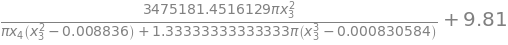

In [22]:
a

We divide by 9.81 to convert acceleration function to gs

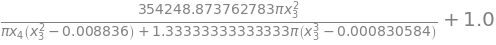

In [23]:
a=a/9.81
a

In [24]:
delta = 0.003
x3max=.1
x3min=.095
x4max=.4
x4min=.1
x3 = np.arange(x3min-delta,x3max+delta, delta)
x4 = np.arange(x4min-delta,x4max+delta, delta)
X3,X4 = np.meshgrid(x3,x4)
a = a.subs(x3,X3)
a = a.subs(x4,X4)
fx = 1+((354248.8737*pi*X3**2)/(pi*X4*(X3**2-.008836)+1.3333*pi*(X3**3-.000830584)))


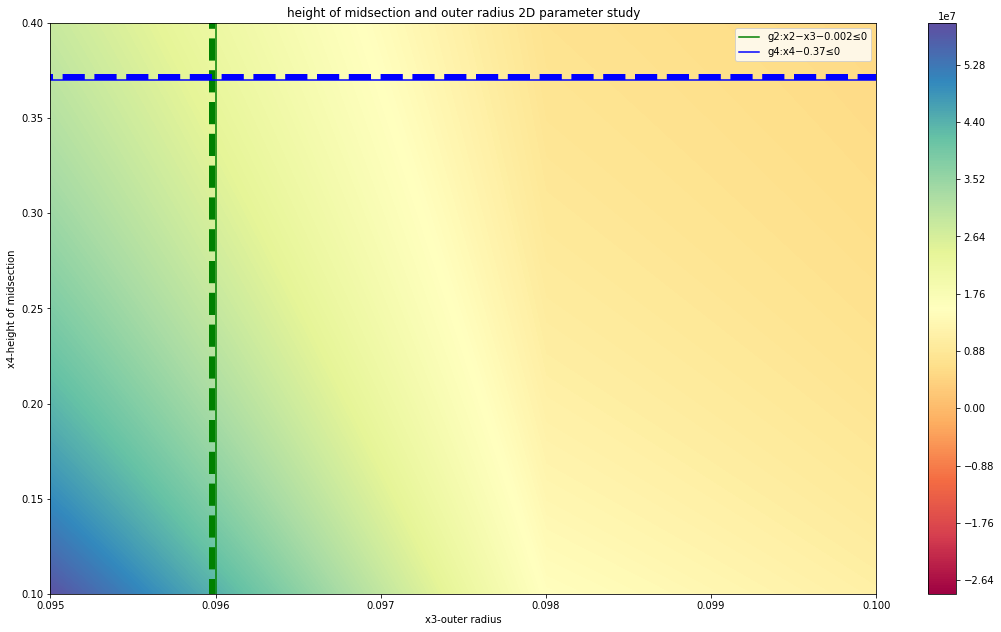

In [25]:
fig,ax=plt.subplots()
CS=ax.contourf(X3,X4,fx,1000,cmap='Spectral')
plt.xlim(x3min,x3max)
plt.ylim(x4min,x4max)
plt.xlabel('x3-outer radius')
plt.ylabel('x4-height of midsection')
plt.colorbar(CS)
fig.set_size_inches(18.5, 10.5)
x3 = np.arange(-1,2,delta)
x4 = np.arange(-1,2,delta)
x2 = .094
g4 = x3*0+x2+.002
g5 = x4*0+.37



g1p=plt.plot(g4*.9998,x3,color='green',linewidth=6,linestyle='--')
g2p=plt.plot(g4,x3,color='green',label='g2:x2−x3−0.002≤0')
g3p=plt.plot(x4,g5*1.005,color='blue',linewidth=6,linestyle='--')
g4p=plt.plot(x4,g5,color='blue',label='g4:x4−0.37≤0')
plt.title('height of midsection and outer radius 2D parameter study')

legend = plt.legend(loc=0)

In [26]:
V